### Name: Prathamesh Rokade
### Class: AIML - C
### Roll No: 57
### Date: 17/09/24

### Aim: Loan default is a significant risk for banks and financial institutions, impacting their profitability and stability. Accurately predicting loan defaults can help banks in their risk assessment processes. Develop machine learning model to predict whether an individual will default on a bank loan based on their financial and demographic data using ensemble learning technique.      
### Perform the EDA      
### Apply Random Forest algorithm
### Apply Adaboost algorithm
### Evaluate the performance using
### Precision, Recall, F1 score and accuracy.
### Develop a model using artificial neural network which can predict whether person will default to bank or not.
### Apply hyper parameter tuning to improve performance.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score
from sklearn.metrics import classification_report
import tensorflow as tf
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Dense
from sklearn.model_selection import GridSearchCV

In [2]:
# Load the dataset
data = pd.read_csv('bank.csv')

In [3]:
# Display basic statistics of the dataset
data.describe()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
count,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000
mean,41.231948,4.487905,1.199337,1.285164,0.015051,1528.538524,0.473123,0.130801,0.489697,15.658036,5.445709,371.993818,2.508421,51.330407,0.832557,2.477782,0.473840
std,11.913369,3.225132,0.625552,0.749478,0.121761,3225.413326,0.499299,0.337198,0.818724,8.420740,3.191939,347.128386,2.722077,108.758282,2.292007,1.002952,0.499338
min,18.000000,0.000000,0.000000,0.000000,0.000000,-6847.000000,0.000000,0.000000,0.000000,1.000000,0.000000,2.000000,1.000000,-1.000000,0.000000,0.000000,0.000000
25%,32.000000,1.000000,1.000000,1.000000,0.000000,122.000000,0.000000,0.000000,0.000000,8.000000,3.000000,138.000000,1.000000,-1.000000,0.000000,2.000000,0.000000
50%,39.000000,4.000000,1.000000,1.000000,0.000000,550.000000,0.000000,0.000000,0.000000,15.000000,6.000000,255.000000,2.000000,-1.000000,0.000000,3.000000,0.000000
75%,49.000000,7.000000,2.000000,2.000000,0.000000,1708.000000,1.000000,0.000000,1.000000,22.000000,8.000000,496.000000,3.000000,20.750000,1.000000,3.000000,1.000000
max,95.000000,11.000000,2.000000,3.000000,1.000000,81204.000000,1.000000,1.000000,2.000000,31.000000,11.000000,3881.000000,63.000000,854.000000,58.000000,3.000000,1.000000


In [4]:
# Display the shape of the dataset
data.shape

(11162, 17)

In [5]:
# Display the first few rows of the dataset
data.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
0,59,0,1,1,0,2343,1,0,2,5,8,1042,1,-1,0,3,1
1,56,0,1,1,0,45,0,0,2,5,8,1467,1,-1,0,3,1
2,41,9,1,1,0,1270,1,0,2,5,8,1389,1,-1,0,3,1
3,55,7,1,1,0,2476,1,0,2,5,8,579,1,-1,0,3,1
4,54,0,1,2,0,184,0,0,2,5,8,673,2,-1,0,3,1


In [6]:
# Display the last few rows of the dataset
data.tail()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
11157,33,1,2,0,0,1,1,0,0,20,0,257,1,-1,0,3,0
11158,39,7,1,1,0,733,0,0,2,16,6,83,4,-1,0,3,0
11159,32,9,2,1,0,29,0,0,0,19,1,156,2,-1,0,3,0
11160,43,9,1,1,0,0,0,1,0,8,8,9,2,172,5,0,0
11161,34,9,1,1,0,0,0,0,0,9,5,628,1,-1,0,3,0


In [7]:
# Check for missing values in the dataset
missing_values = data.isnull().sum()

missing_values

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
deposit      0
dtype: int64

In [8]:
# Check for duplicates
print("Duplicates:\n", data.duplicated().sum())

Duplicates:
 0


In [9]:
data.columns

Index(['age', 'job', 'marital', 'education', 'default', 'balance', 'housing',
       'loan', 'contact', 'day', 'month', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'deposit'],
      dtype='object')

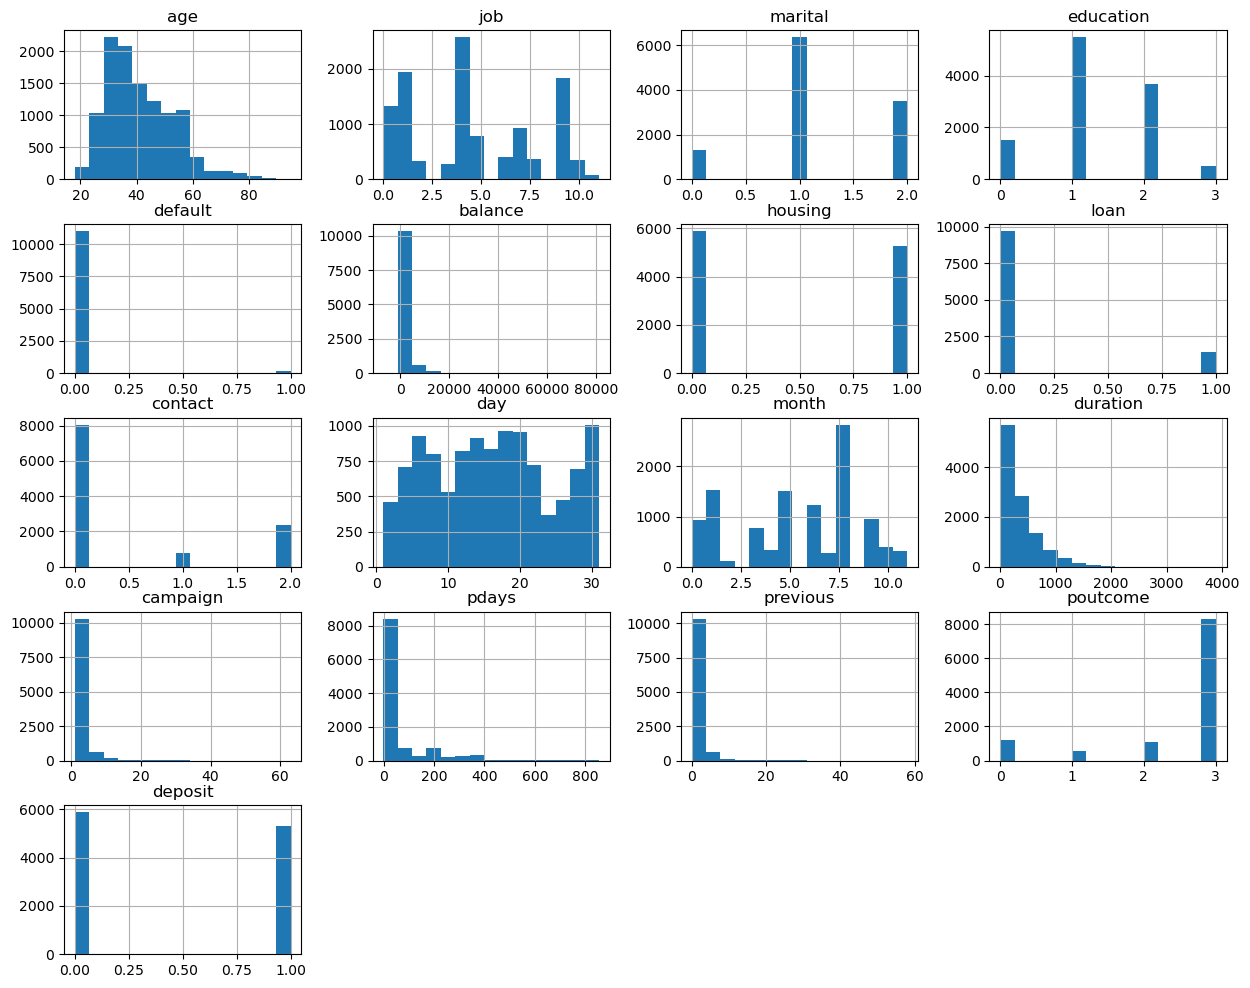

In [10]:
data.hist(figsize=(15,12),bins = 15)
plt.title("Features Distribution")
plt.show()

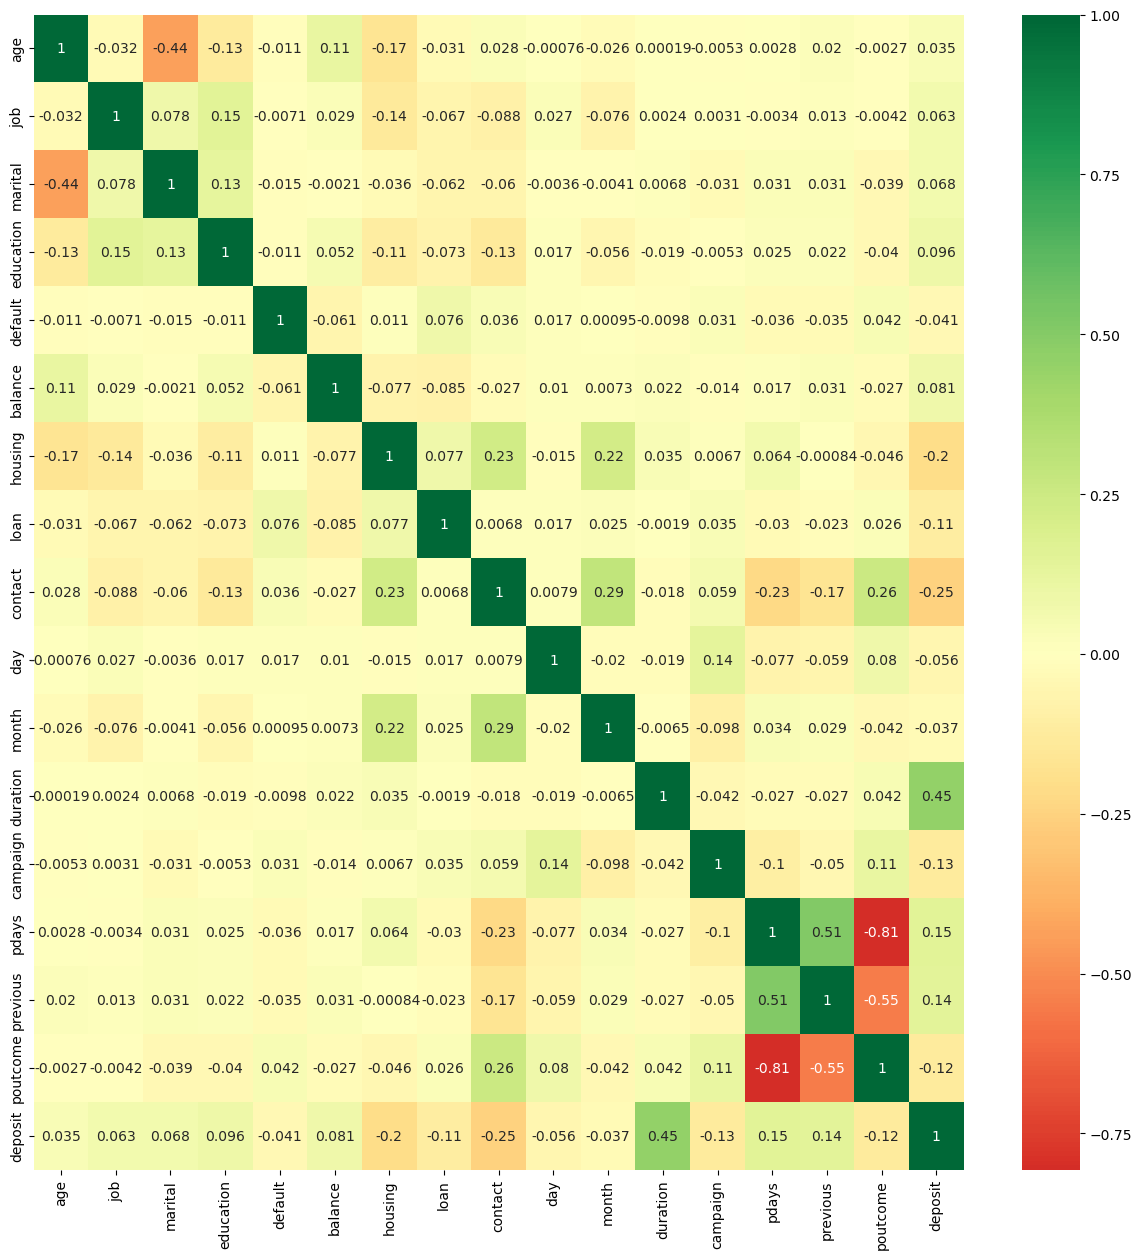

In [11]:
plt.figure(figsize=(15,15))
p=sns.heatmap(data.corr(), annot=True,cmap='RdYlGn',center=0) 

In [12]:
# Separate the features and target
X = data.drop('default', axis=1)  # Features
y = data['default']  # Target (whether an individual defaults)

# Split the dataset into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [13]:
# Standardize the features for the neural network model
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [14]:
# Initialize the RandomForest model
rf_model = RandomForestClassifier(random_state=42)

In [15]:
rf_model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [16]:
# Predict using the test set
y_pred_rf = rf_model.predict(X_test)

# Evaluate the model performance
accuracy_rf = accuracy_score(y_test, y_pred_rf)
precision_rf = precision_score(y_test, y_pred_rf)
recall_rf = recall_score(y_test, y_pred_rf)
f1_rf = f1_score(y_test, y_pred_rf)

In [17]:
print("Accuracy: ",accuracy_rf)
print("Precision: ",precision_rf)
print("Recall: ",recall_rf)
print("F1 Score: ",f1_rf)

Accuracy:  0.9847738468428123
Precision:  1.0
Recall:  0.02857142857142857
F1 Score:  0.05555555555555556


In [18]:
print(classification_report(y_test,y_pred_rf))

              precision    recall  f1-score   support

           0       0.98      1.00      0.99      2198
           1       1.00      0.03      0.06        35

    accuracy                           0.98      2233
   macro avg       0.99      0.51      0.52      2233
weighted avg       0.99      0.98      0.98      2233



In [19]:
# Initialize the AdaBoost model
ada_model = AdaBoostClassifier(random_state=42)

In [20]:
# Train the model
ada_model.fit(X_train, y_train)

AdaBoostClassifier(random_state=42)

In [21]:
# Predict using the test set
y_pred_ada = ada_model.predict(X_test)

# Evaluate the model performance
accuracy_ada = accuracy_score(y_test, y_pred_ada)
precision_ada = precision_score(y_test, y_pred_ada)
recall_ada = recall_score(y_test, y_pred_ada)
f1_ada = f1_score(y_test, y_pred_ada)

In [22]:
print("Accuracy: ",accuracy_ada)
print("Precision: ",precision_ada)
print("Recall: ",recall_ada)
print("F1 Score: ",f1_ada)

Accuracy:  0.9838781907747425
Precision:  0.0
Recall:  0.0
F1 Score:  0.0


In [23]:
print(classification_report(y_test,y_pred_ada))

              precision    recall  f1-score   support

           0       0.98      1.00      0.99      2198
           1       0.00      0.00      0.00        35

    accuracy                           0.98      2233
   macro avg       0.49      0.50      0.50      2233
weighted avg       0.97      0.98      0.98      2233



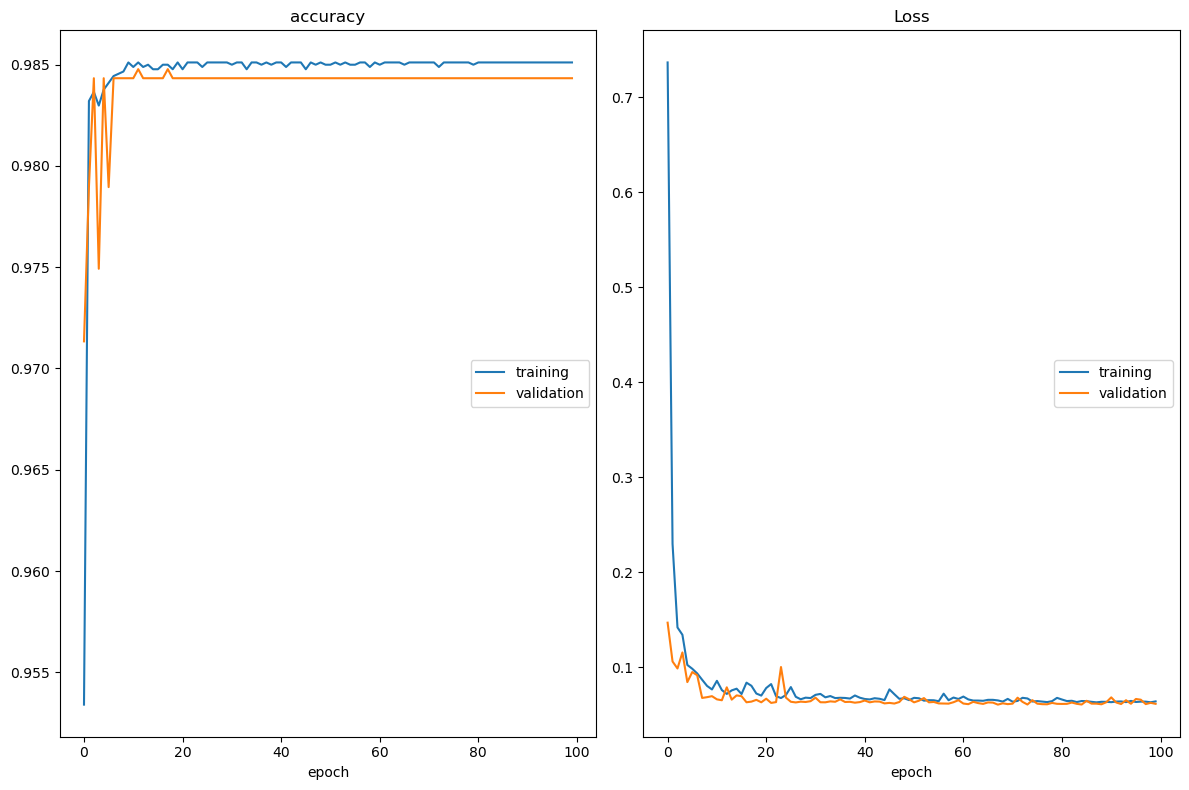

accuracy
	training         	 (min:    0.953, max:    0.985, cur:    0.985)
	validation       	 (min:    0.971, max:    0.985, cur:    0.984)
Loss
	training         	 (min:    0.063, max:    0.737, cur:    0.064)
	validation       	 (min:    0.061, max:    0.147, cur:    0.062)
893/893 ━━━━━━━━━━━━━━━━━━━━ 1s 868us/step - accuracy: 0.9856 - loss: 0.0620 - val_accuracy: 0.9843 - val_loss: 0.0616


In [26]:
from keras.models import Sequential
from keras.layers import Dense
from livelossplot import PlotLossesKeras

classifier = Sequential()

# Adding the input layer and the first hidden layer
classifier.add(Dense(8, activation='relu', name="Input_layer"))

# Adding the second hidden layer
classifier.add(Dense(12, activation='relu', name="Hidden_layer_2"))

# Adding the output layer
classifier.add(Dense(1, activation='sigmoid', name="Output_layer"))

# Compiling the ANN
classifier.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Fitting the ANN to the Training set
classifier.fit(X_train, y_train, batch_size=10, epochs=100, validation_data=(X_test, y_test), callbacks=[PlotLossesKeras()])


In [27]:
# Evaluating the model on the Training set
score, acc = classifier.evaluate(X_train, y_train, batch_size=10)
print('Train score:', score)
print('Train accuracy:', acc)

# Part 3 - Making predictions and evaluating the model

# Predicting the Test set results
y_pred = classifier.predict(X_test)
y_pred = (y_pred > 0.5)

print('*' * 20)

# Evaluating the model on the Test set
score, acc = classifier.evaluate(X_test, y_test, batch_size=10)
print('Test score:', score)
print('Test accuracy:', acc)

# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
print('Confusion Matrix:\n', cm)

893/893 ━━━━━━━━━━━━━━━━━━━━ 0s 439us/step - accuracy: 0.9836 - loss: 0.0675
Train score: 0.06252419948577881
Train accuracy: 0.9851047396659851
70/70 ━━━━━━━━━━━━━━━━━━━━ 0s 717us/step
********************
224/224 ━━━━━━━━━━━━━━━━━━━━ 0s 503us/step - accuracy: 0.9774 - loss: 0.0843
Test score: 0.06157051771879196
Test accuracy: 0.9843260049819946
Confusion Matrix:
 [[2198    0]
 [  35    0]]


Text(0.5, 23.52222222222222, 'Predicted label')

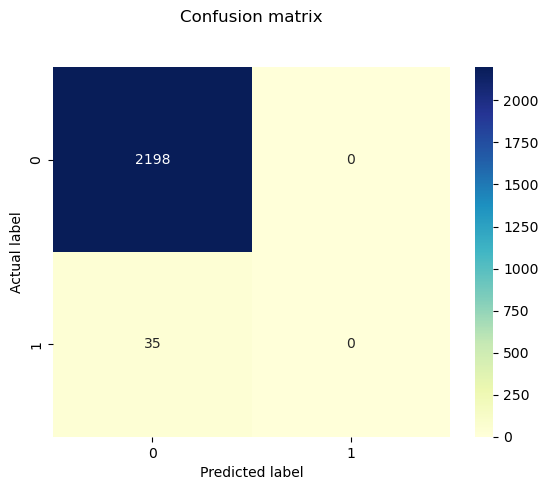

In [28]:
p = sns.heatmap(pd.DataFrame(cm), annot=True, cmap="YlGnBu" ,fmt='g')
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

In [33]:
# Evaluate the model performance
accuracy_ann = accuracy_score(y_test, y_pred)
precision_ann = precision_score(y_test, y_pred)
recall_ann = recall_score(y_test, y_pred)
f1_ann = f1_score(y_test, y_pred)

In [34]:
print("Accuracy: ",accuracy_ann)
print("Precision: ",precision_ann)
print("Recall: ",recall_ann)
print("F1 Score: ",f1_ann)

Accuracy:  0.9843260188087775
Precision:  0.0
Recall:  0.0
F1 Score:  0.0


In [35]:
import warnings
# Suppress all warnings
warnings.filterwarnings("ignore")
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.98      1.00      0.99      2198
           1       0.00      0.00      0.00        35

    accuracy                           0.98      2233
   macro avg       0.49      0.50      0.50      2233
weighted avg       0.97      0.98      0.98      2233



In [36]:
# Compare performance across models
models = ['Random Forest', 'AdaBoost', 'ANN']
accuracies = [accuracy_rf, accuracy_ada, accuracy_ann]
precisions = [precision_rf, precision_ada, precision_ann]
recalls = [recall_rf, recall_ada, recall_ann]
f1_scores = [f1_rf, f1_ada, f1_ann]

performance_df = pd.DataFrame({
    'Model': models,
    'Accuracy': accuracies,
    'Precision': precisions,
    'Recall': recalls,
    'F1 Score': f1_scores
})

print(performance_df)

           Model  Accuracy  Precision    Recall  F1 Score
0  Random Forest  0.984774        1.0  0.028571  0.055556
1       AdaBoost  0.983878        0.0  0.000000  0.000000
2            ANN  0.984326        0.0  0.000000  0.000000
